## Imports and preparations

In [ ]:
import pandas as pd
import numpy as np
import csv
from matplotlib import pyplot as plt
from calendar import month_abbr


In [199]:
train_data = pd.read_csv("train.csv")

## Data Exploration

### We will start with a glimpse of data and its features:

In [ ]:
print(f"Data description:")
train_data.describe()

In [ ]:
print(f"Data glimpse:")
train_data.head()

In [ ]:
print(f"Number of rows: {train_data.shape[0]}")
print(f"Number of features: {train_data.shape[1]}")

In [163]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10479 entries, 0 to 10478
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     10479 non-null  int64  
 1   num_of_admin_pages     9874 non-null   float64
 2   admin_page_duration    10066 non-null  float64
 3   num_of_info_pages      9792 non-null   float64
 4   info_page_duration     10162 non-null  float64
 5   num_of_product_pages   10076 non-null  float64
 6   product_page_duration  9858 non-null   float64
 7   total_duration         5726 non-null   float64
 8   BounceRates            10457 non-null  float64
 9   ExitRates              10453 non-null  float64
 10  PageValues             10452 non-null  float64
 11  closeness_to_holiday   9983 non-null   float64
 12  Month                  10479 non-null  int64  
 13  device                 10156 non-null  float64
 14  internet_browser       9916 non-null   object 
 15  Re

In [200]:
def extract_num(val):
    if type(val) == str:
        return float(val.split()[0])
    else:
        return val


train_data.replace({False: 0, True: 1}, inplace=True)
train_data["user_type"].replace({"Returning_Visitor": 0, "New_Visitor": 1, "Other": 2}, inplace=True)
train_data["user_type"].fillna(2,inplace=True)


In [ ]:
c_list = []
for colname, coltype in train_data.dtypes.iteritems():
    if coltype == object and colname not in ['internet_browser', 'user_type', 'Weekend', 'A', 'C']:
        train_data[colname] = train_data[colname].apply(extract_num)
        c_list.append(colname)
    if coltype in [int, float]:  
        c_list.append(colname)


At first, we tried to look at the data and get familiar with it how it looks, and which data types are used for each column.
We used df.describe, df. head and df.info to just have a glimpse at the data and "feel" how it behaves.
It will later help us to understand how we would like to manipulate it in our favor.

One of the first thins we've noticed that not all of data is in int/float types, and some of the columes have unnecessary strings in it. We used an apply functions to clean the strings.
In addition, we changed the "Weekend" values from True/False to 1/0, and mapped the "Visitor Types" to numbers as well.

### Data visualization and distribution:

Let's start with some Boxplots:

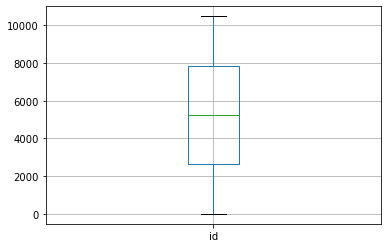

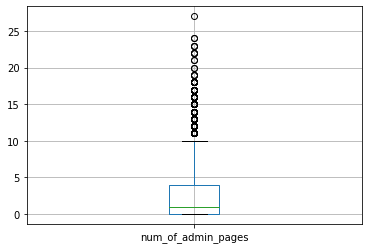

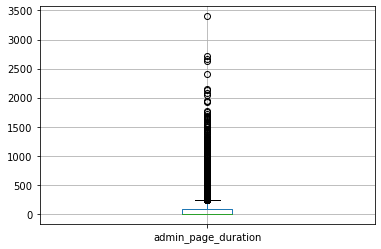

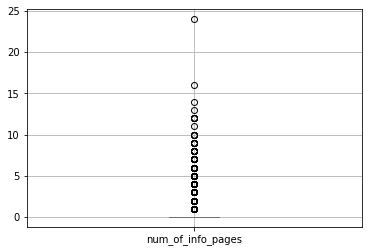

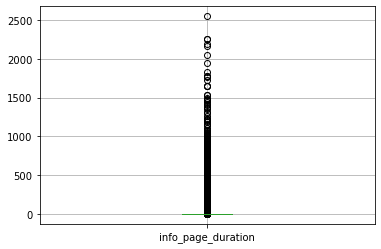

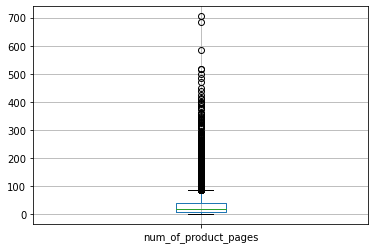

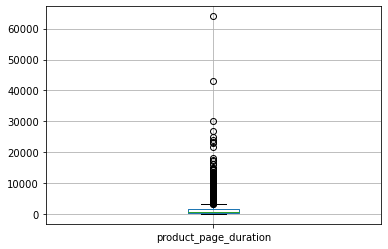

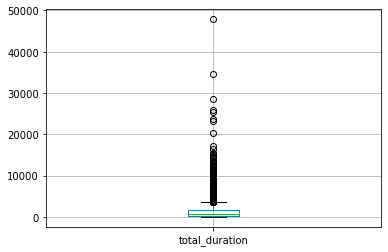

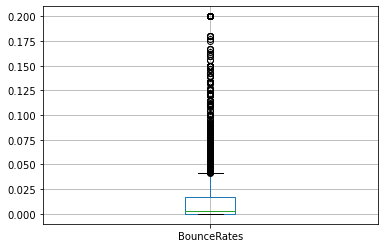

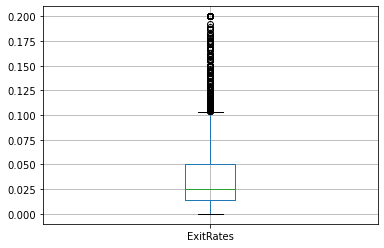

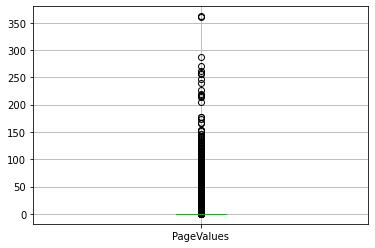

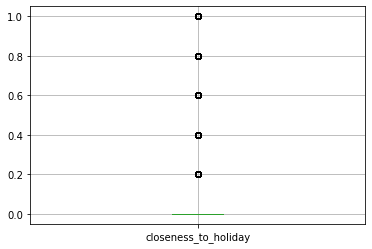

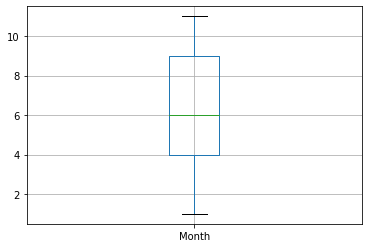

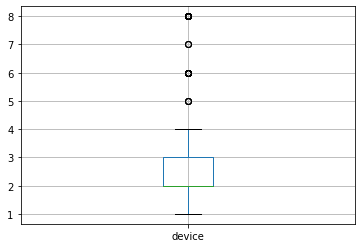

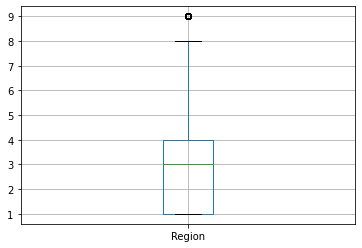

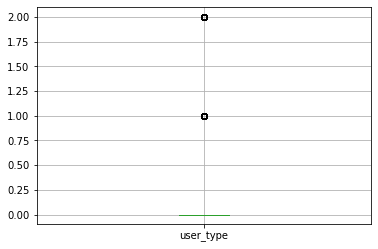

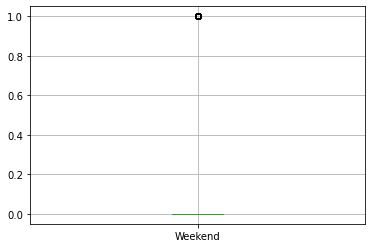

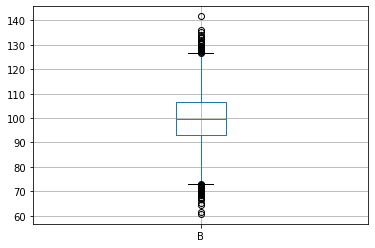

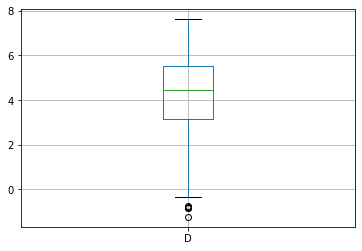

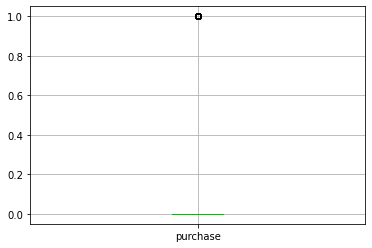

In [182]:
 for column in c_list:
    plt.figure()
    train_data.boxplot([column])